In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [2]:
df=pd.read_csv("yrd.csv")

In [3]:
df=df.drop("PC_YRD",1)

In [4]:
df.head()

,DATE,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),Height (Re14-cb) (m)
0,2013/6/1,525.800000,62.083333,0.480000,88.600000,1538.400000
1,2013/6/6,993.000000,23.887500,0.186250,14.500000,2489.250000
2,2013/6/12,158.375000,85.555556,0.946250,3.750000,1307.625000
3,2013/6/17,1680.944444,80.904762,0.136667,4.166667,2428.666667
4,2013/6/18,1911.000000,65.300000,0.105000,57.000000,3192.500000


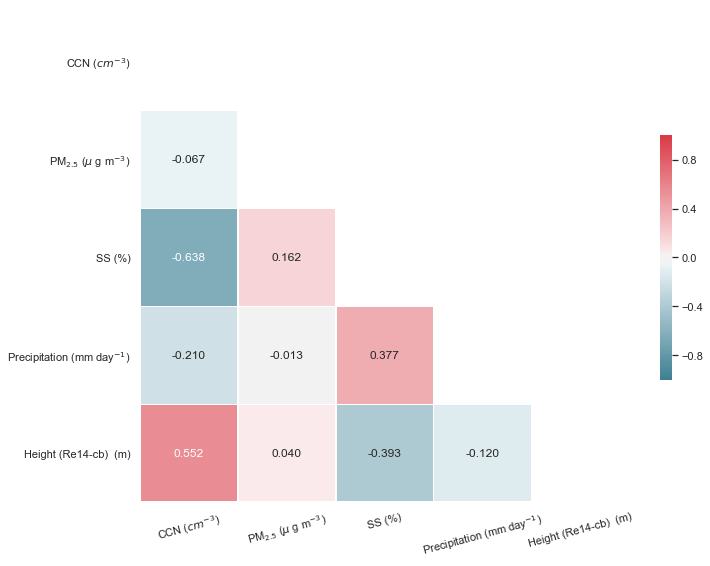

In [5]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("YRD_corr_num1-allrain.png",dpi=600)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.set_index('DATE', inplace=True)

In [8]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "yrd_profilerain.html")

In [9]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,29.524,340,two-sided,7.636073e-96,"[902.84, 1031.72]",3.193,7.222e+91,1.0


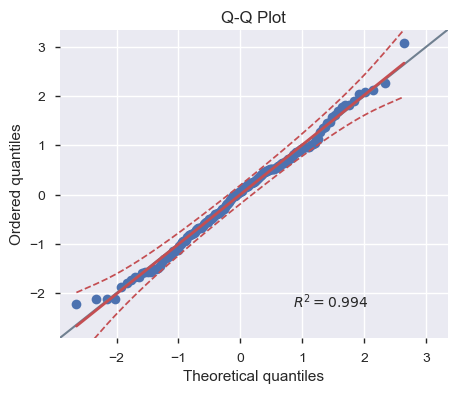

In [10]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [11]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,171,-0.21,"[-0.35, -0.06]",0.044,0.033,0.005802,4.162,0.792


In [12]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["PM$_{2.5}$ ($\mu$ g m$^{-3}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,171,-0.067,"[-0.21, 0.08]",0.004,-0.007,0.386978,0.139,0.139


In [13]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,171,-0.638,"[-0.72, -0.54]",0.407,0.4,6.715034e-21,8.147e+17,1.0


In [14]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,171,0.552,"[0.44, 0.65]",0.305,0.297,4.874587e-15,1.507e+12,1.0


In [15]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,171,-0.139,"[-0.28, 0.01]",0.019,0.008,0.069898,0.443


In [16]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='PM$_{2.5}$ ($\mu$ g m$^{-3}$)', subject='PC_YRD')

AssertionError: The PC_YRD column is not in data.

In [ ]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='SS (%)', subject='PC_YRD')

In [ ]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Height (Re14-cb)  (m)', subject='PC_YRD')